# Climate Change: Analyzing Trends and Developing Sustainable Solutions

### Objective:
- Analyze current climate change data to identify trends in global temperature, CO2 emissions, and their environmental impact.
- Use data analytics tools and algorithms to predict future trends in climate
  change.
- Develop a sustainable solution or recommendation for mitigating the effects of climate change, using data-driven insights.

### Scope:
1.Data Collection and Preprocessing.

2.Exploratory Data Analysis (EDA).

3.Feature Engineering.

4.Model Development.

5.Insights

### Data Loading 

In [55]:
import pandas as pd
import numpy as np
df=pd.read_csv('climate.csv')
df.head(10)

,Year,Month,Avg_Temp (°C),Max_Temp (°C),Min_Temp (°C),Precipitation (mm),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),CO2_Concentration (ppm),Latitude,Longitude,Altitude (m),Proximity_to_Water (km),Urbanization_Index,Vegetation_Index,ENSO_Index,Particulate_Matter (µg/m³),Sea_Surface_Temp (°C)
0,NaN,1.0,-3.460516,33.056918907353285,NaN,184.89969755743786,89.62081302618182,9.742885739415993,NaN,58.530797670209076,NaN,40.7128,NaN,10.0,15.0,NaN,0.04423782887418304,0.6336943092843479,33.43707805480527,18.545360112309588
1,2020.0,2.0,NaN,25.901916083791665,3.1739745975583844,2.957244192049635,95.17102000342224,10.64824600272703,252.3136442294677,32.85666516634471,419.595924,40.7128,-74.006,10.0,15.0,99999.000000,0.6128400325468267,NaN,24.504783135571934,15.909586979280654
2,2020.0,3.0,7.869842,18.63424149980029,10.42485208665568,NaN,NaN,NaN,247.39139984511084,29.380233637986674,416.650458,40.7128,-74.006,10.0,15.0,0.341732,0.4665653848003175,-0.4280583600093959,32.3274997743319,21.281093622177334
3,NaN,4.0,-0.049863,13.030562376875533,-9.196433418151315,102.4544605414934,Unknown,0.898697634212508,143.26161801322706,17.496855610388273,418.922808,40.7128,-74.006,10.0,15.0,0.896383,0.030465932726280065,-0.5707078659552114,20.496275820817043,NaN
4,2020.0,5.0,19.895067,35.88212887551623,20.067999652410148,185.72922332959365,73.99994640624561,13.128301152215258,169.5494376964624,2.1937104861995405,401.896588,40.7128,-74.006,10.0,99999.0,0.076173,NaN,-0.2861494705734404,22.64905691725084,15.502968235198333
5,2020.0,6.0,2.195886,16.815980053623928,21.69339369094645,26.296148446729873,35.626443191624936,2.7860050941947905,158.7524359120713,96.05477049972627,400.351530,NaN,NaN,10.0,15.0,0.731544,0.04365568216176974,-0.23867083029214586,26.350879986637086,16.90621134574127
6,NaN,7.0,-0.831502,NaN,-9.098586846479657,22.98402037192848,NaN,11.036926613168248,201.69895236814938,2.859401235842318,411.559105,NaN,-74.006,10.0,15.0,0.179720,0.921412688375088,0.496792285006872,23.749488315782877,27.71362771832118
7,2020.0,8.0,5.241145,23.018365507255687,-2.8241009285731744,100.23810532116136,75.36834893597688,12.462339982116639,89.70128267136548,92.01998586610826,423.297603,40.7128,-74.006,10.0,15.0,0.469346,0.3578404397196293,0.5235609705809126,48.53486454396686,NaN
8,2020.0,9.0,34.282303,4.777629228981937,0.39121915565166177,199.45034189396836,96.81856590078783,8.00856854128788,227.88277854059066,98.88385241970374,432.839126,40.7128,-74.006,10.0,15.0,0.364741,0.3564403191108527,NaN,34.55780020584284,14.494095352151927
9,2020.0,10.0,25.979140,11.02265627885938,-7.649405276953751,NaN,86.06230719949002,99999.0,235.229354907283,51.5837019990618,444.483466,40.7128,-74.006,10.0,15.0,NaN,0.12975718070926812,-0.7530669500931289,15.21072251366412,17.138927964036846


### Initial inspection

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        48 non-null     object 
 1   Month                       48 non-null     object 
 2   Avg_Temp (°C)               46 non-null     float64
 3   Max_Temp (°C)               46 non-null     object 
 4   Min_Temp (°C)               45 non-null     object 
 5   Precipitation (mm)          49 non-null     object 
 6   Humidity (%)                45 non-null     object 
 7   Wind_Speed (m/s)            51 non-null     object 
 8   Solar_Irradiance (W/m²)     48 non-null     object 
 9   Cloud_Cover (%)             49 non-null     object 
 10  CO2_Concentration (ppm)     47 non-null     float64
 11  Latitude                    47 non-null     object 
 12  Longitude                   50 non-null     object 
 13  Altitude (m)                49 non-nu

In [58]:
#Convert into suitable data types 
df['Year']=pd.to_numeric(df['Year'],errors='coerce').astype('Int64')
df['Month']=pd.to_numeric(df['Month'],errors='coerce').astype('Int64')
df['Avg_Temp (°C)']=pd.to_numeric(df['Avg_Temp (°C)'],errors='coerce').astype(float)
df['Max_Temp (°C)']=pd.to_numeric(df['Max_Temp (°C)'],errors='coerce').astype(float)
df['Min_Temp (°C)']=pd.to_numeric(df['Min_Temp (°C)'],errors='coerce').astype(float)
df['Precipitation (mm)']=pd.to_numeric(df['Precipitation (mm)'],errors='coerce').astype(float)
df['Humidity (%)']=pd.to_numeric(df['Humidity (%)'],errors='coerce').astype(float)
df['Wind_Speed (m/s)']=pd.to_numeric(df['Wind_Speed (m/s)'],errors='coerce').astype(float)
df['Solar_Irradiance (W/m²)']=pd.to_numeric(df['Solar_Irradiance (W/m²)'],errors='coerce').astype(float)
df['Cloud_Cover (%)']=pd.to_numeric(df['Cloud_Cover (%)'],errors='coerce').astype(float)
df['CO2_Concentration (ppm)']=pd.to_numeric(df['CO2_Concentration (ppm)'],errors='coerce').astype(float)
df['Latitude']=pd.to_numeric(df['Latitude'],errors='coerce').astype(float)
df['Longitude']=pd.to_numeric(df['Longitude'],errors='coerce').astype(float)
df['Altitude (m)']=pd.to_numeric(df['Altitude (m)'],errors='coerce').astype(float)
df['Proximity_to_Water (km)']=pd.to_numeric(df['Proximity_to_Water (km)'],errors='coerce').astype(float)
df['Urbanization_Index']=pd.to_numeric(df['Urbanization_Index'],errors='coerce').astype(float)
df['Vegetation_Index']=pd.to_numeric(df['Vegetation_Index'],errors='coerce').astype(float)
df['ENSO_Index']=pd.to_numeric(df['ENSO_Index'],errors='coerce').astype(float)
df['Particulate_Matter (µg/m³)']=pd.to_numeric(df['Particulate_Matter (µg/m³)'],errors='coerce').astype(float)
df['Sea_Surface_Temp (°C)']=pd.to_numeric(df['Sea_Surface_Temp (°C)'],errors='coerce').astype(float)

In [59]:
df.dtypes

Year                            Int64
Month                           Int64
Avg_Temp (°C)                 float64
Max_Temp (°C)                 float64
Min_Temp (°C)                 float64
Precipitation (mm)            float64
Humidity (%)                  float64
Wind_Speed (m/s)              float64
Solar_Irradiance (W/m²)       float64
Cloud_Cover (%)               float64
CO2_Concentration (ppm)       float64
Latitude                      float64
Longitude                     float64
Altitude (m)                  float64
Proximity_to_Water (km)       float64
Urbanization_Index            float64
Vegetation_Index              float64
ENSO_Index                    float64
Particulate_Matter (µg/m³)    float64
Sea_Surface_Temp (°C)         float64
dtype: object

### Missing value imputation

In [60]:
df.isnull().sum()

Year                          6
Month                         6
Avg_Temp (°C)                 7
Max_Temp (°C)                 8
Min_Temp (°C)                 9
Precipitation (mm)            5
Humidity (%)                  9
Wind_Speed (m/s)              3
Solar_Irradiance (W/m²)       6
Cloud_Cover (%)               5
CO2_Concentration (ppm)       6
Latitude                      7
Longitude                     4
Altitude (m)                  5
Proximity_to_Water (km)       7
Urbanization_Index            3
Vegetation_Index              4
ENSO_Index                    4
Particulate_Matter (µg/m³)    4
Sea_Surface_Temp (°C)         8
dtype: int64

In [61]:
df['Avg_Temp (°C)'].fillna(df['Avg_Temp (°C)'].mean(), inplace=True)
df['Max_Temp (°C)'].fillna(df['Max_Temp (°C)'].mean(), inplace=True)
df['Min_Temp (°C)'].fillna(df['Min_Temp (°C)'].mean(), inplace=True)
df['Precipitation (mm)'].fillna(df['Precipitation (mm)'].mean(), inplace=True)
df['Humidity (%)'].replace('Unknown', np.nan, inplace=True)
df['Humidity (%)'].fillna(df['Humidity (%)'].mean(), inplace=True)
df['Wind_Speed (m/s)'].fillna(df['Wind_Speed (m/s)'].mean(), inplace=True)
df['Solar_Irradiance (W/m²)'].fillna(df['Solar_Irradiance (W/m²)'].mean(),inplace=True)
df['Solar_Irradiance (W/m²)'].fillna(df['Solar_Irradiance (W/m²)'].mean(), inplace=True)
df['Cloud_Cover (%)'].fillna(df['Cloud_Cover (%)'].mean(), inplace=True)
df['CO2_Concentration (ppm)'].fillna(df['CO2_Concentration (ppm)'].mean(), inplace=True)
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)
df['Altitude (m)'].fillna(df['Altitude (m)'].mean(), inplace=True)
df['Proximity_to_Water (km)'].fillna(df['Proximity_to_Water (km)'].mean(), inplace=True)
df['Urbanization_Index'].fillna(df['Urbanization_Index'].mean(), inplace=True)
df['Vegetation_Index'].fillna(df['Vegetation_Index'].mean(), inplace=True)
df['ENSO_Index'].fillna(df['ENSO_Index'].mean(), inplace=True)
df['Particulate_Matter (µg/m³)'].fillna(df['Particulate_Matter (µg/m³)'].mean(), inplace=True)
df['Sea_Surface_Temp (°C)'].fillna(df['Sea_Surface_Temp (°C)'].mean(), inplace=True)

print("Missing values after imputation\n",df.isnull().sum())

Missing values after imputation
 Year                          6
Month                         6
Avg_Temp (°C)                 0
Max_Temp (°C)                 0
Min_Temp (°C)                 0
Precipitation (mm)            0
Humidity (%)                  0
Wind_Speed (m/s)              0
Solar_Irradiance (W/m²)       0
Cloud_Cover (%)               0
CO2_Concentration (ppm)       0
Latitude                      0
Longitude                     0
Altitude (m)                  0
Proximity_to_Water (km)       0
Urbanization_Index            0
Vegetation_Index              0
ENSO_Index                    0
Particulate_Matter (µg/m³)    0
Sea_Surface_Temp (°C)         0
dtype: int64


### outlier correction

In [62]:
df=df.dropna()

In [208]:
#function to remove outliers
def remove_outliers(df,column):
    Q1=df[column].dropna().quantile(0.25)
    Q3=df[column].dropna().quantile(0.75)
    IQR=Q3-Q1
    lbound=Q1-1.5*IQR
    ubound=Q3+1.5*IQR
    df.loc[df[column] < lbound, column] = lbound
    df.loc[df[column] > ubound, column] = ubound
    return df

for column in df.select_dtypes(include=[np.float64,np.int64]).columns:
    df=remove_outliers(df,column)
print("Outliers removed successfully")

Outliers removed successfully


## Exploratory Data Analysis

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
df.head(15)

,Year,Month,Avg_Temp (°C),Max_Temp (°C),Min_Temp (°C),Precipitation (mm),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),CO2_Concentration (ppm),Latitude,Longitude,Altitude (m),Proximity_to_Water (km),Urbanization_Index,Vegetation_Index,ENSO_Index,Particulate_Matter (µg/m³),Sea_Surface_Temp (°C)
1,2020,2,13.018699,25.901916,3.173975,2.957244,95.171020,10.648246,252.313644,32.856665,419.595924,40.7128,-74.006,10.0,15.0,1.830411,0.612840,2.411320,24.504783,15.909587
2,2020,3,7.869842,18.634241,10.424852,378.568352,67.269673,22.831030,247.391400,29.380234,416.650458,40.7128,-74.006,10.0,15.0,0.341732,0.466565,-0.428058,32.327500,21.281094
4,2020,5,19.895067,35.882129,20.068000,185.729223,73.999946,13.128301,169.549438,2.193710,401.896588,40.7128,-74.006,10.0,15.0,0.076173,0.441901,-0.286149,22.649057,15.502968
5,2020,6,2.195886,16.815980,21.693394,26.296148,35.626443,2.786005,158.752436,96.054770,400.351530,40.7128,-74.006,10.0,15.0,0.731544,0.043656,-0.238671,26.350880,16.906211
7,2020,8,5.241145,23.018366,-2.824101,100.238105,75.368349,12.462340,89.701283,92.019986,423.297603,40.7128,-74.006,10.0,15.0,0.469346,0.357840,0.523561,48.534865,19.545298
8,2020,9,34.282303,4.777629,0.391219,199.450342,96.818566,8.008569,227.882779,98.883852,432.839126,40.7128,-74.006,10.0,15.0,0.364741,0.356440,2.411320,34.557800,14.494095
9,2020,10,25.979140,11.022656,-7.649405,378.568352,86.062307,22.831030,235.229355,51.583702,444.483466,40.7128,-74.006,10.0,15.0,1.830411,0.129757,-0.753067,15.210723,17.138928
10,2020,11,11.442449,16.309470,-8.546003,158.671859,53.766717,0.308558,108.150621,29.311053,414.171910,40.7128,-74.006,10.0,15.0,0.137755,0.441901,2.411320,37.224282,24.240768
12,2021,1,7.587887,15.279342,63.537777,185.051493,67.498860,8.051787,129.632548,78.756750,425.653185,40.7128,-74.006,10.0,15.0,0.957021,0.330137,0.709168,10.088137,10.002861
14,2021,3,17.699151,22.484153,25.514134,131.414277,49.276024,2.053037,106.427121,24.803797,442.844226,40.7128,-74.006,10.0,15.0,0.713257,0.055558,-0.377986,22.397925,26.332337


### Lineplot

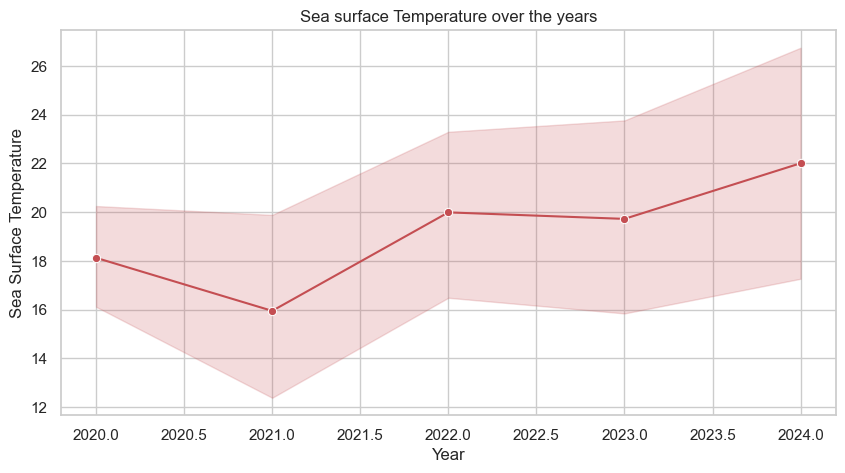

In [210]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='Year',y='Sea_Surface_Temp (°C)',marker='o',color='r')
plt.title("Sea surface Temperature over the years")
plt.xlabel("Year")
plt.ylabel("Sea Surface Temperature")
plt.show()

In [211]:
df.columns

Index(['Year', 'Month', 'Avg_Temp (°C)', 'Max_Temp (°C)', 'Min_Temp (°C)',
       'Precipitation (mm)', 'Humidity (%)', 'Wind_Speed (m/s)',
       'Solar_Irradiance (W/m²)', 'Cloud_Cover (%)', 'CO2_Concentration (ppm)',
       'Latitude', 'Longitude', 'Altitude (m)', 'Proximity_to_Water (km)',
       'Urbanization_Index', 'Vegetation_Index', 'ENSO_Index',
       'Particulate_Matter (µg/m³)', 'Sea_Surface_Temp (°C)'],
      dtype='object')

### Barchart

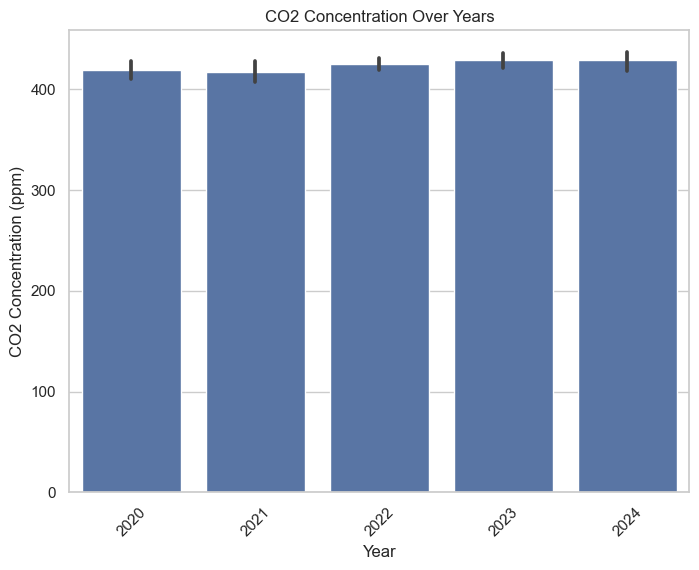

In [212]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Year', y='CO2_Concentration (ppm)', color='b')
plt.title("CO2 Concentration Over Years")
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.xticks(rotation=45)
plt.show()

### Scatterplot

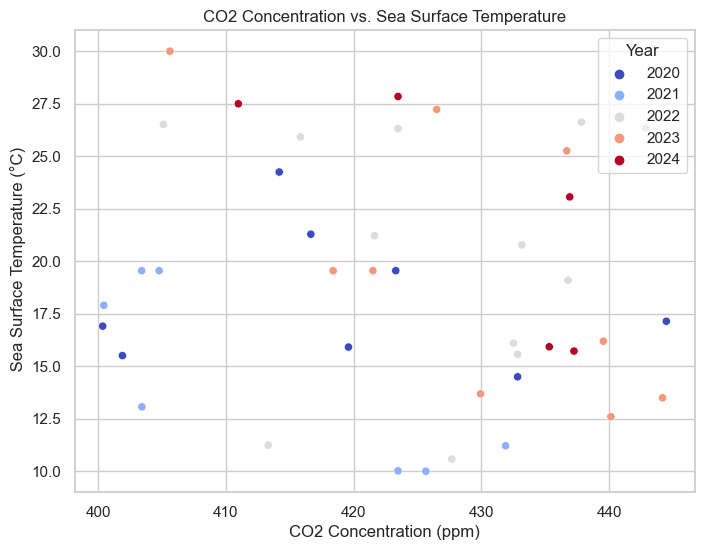

In [213]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CO2_Concentration (ppm)', y='Sea_Surface_Temp (°C)', hue='Year', palette='coolwarm')
plt.title("CO2 Concentration vs. Sea Surface Temperature")
plt.xlabel("CO2 Concentration (ppm)")
plt.ylabel(" Sea Surface Temperature (°C)")
plt.show()

### Correlation Heatmap

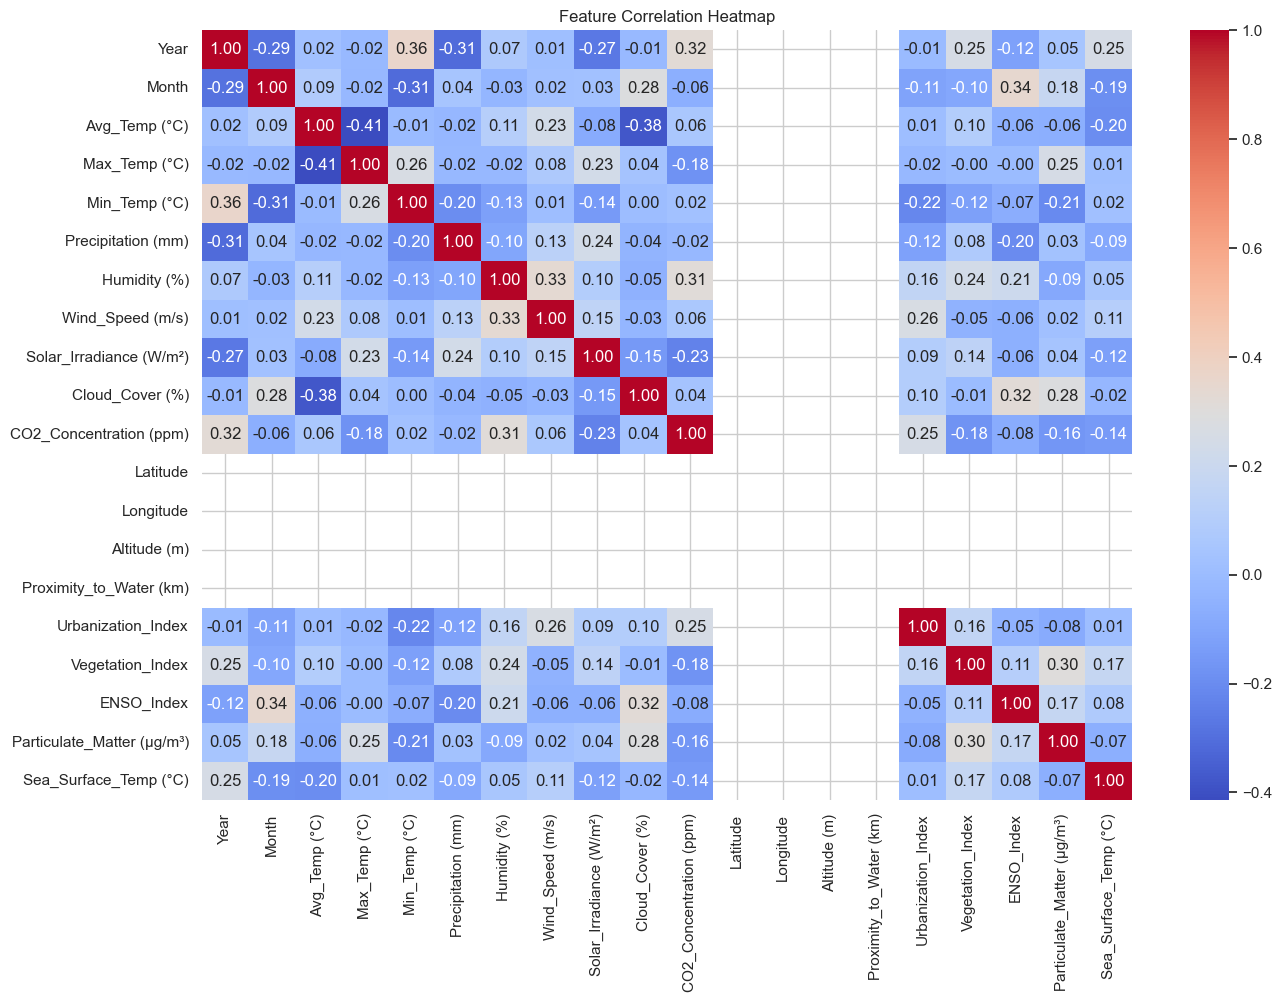

In [214]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

## Model Development

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

#Select Features

X = df[['CO2_Concentration (ppm)', 'Solar_Irradiance (W/m²)', 'ENSO_Index', 
        'Precipitation (mm)', 'Humidity (%)']]
y = df['Sea_Surface_Temp (°C)']

In [216]:
#Split data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#train the model
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [217]:
#Make predictions
y_pred=regressor.predict(X_test)
y_pred

array([16.90149715, 19.21062819, 19.92647459, 17.27323827, 21.22208072,
       18.59544146, 15.93105804, 21.59804292, 15.44476919])

## Testing and Validation of model

In [218]:
#Evaluate Model Performance using various metrics
print("mean square error",mean_squared_error(y_test,y_pred))
print("R² Score",r2_score(y_test,y_pred))

mean square error 41.09456095376432
R² Score -0.05963459714252917


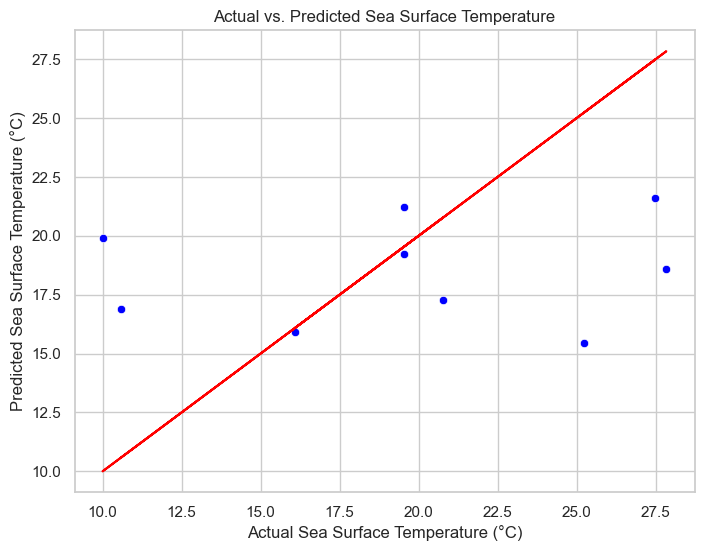

In [220]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Sea Surface Temperature (°C)")
plt.ylabel("Predicted Sea Surface Temperature (°C)")
plt.title("Actual vs. Predicted Sea Surface Temperature")
plt.show()